## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

def Process_RandomForest(dataset,modeltype,n_estimators_area):
    # 切分訓練集/測試集
    x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=4)

    accs = []
    for n in n_estimators_area:
        if modeltype == 'Regressor':
            # 建立模型 (使用 n 顆樹，每棵樹的最大深度為 4)
            model = RandomForestRegressor(n_estimators=n, max_depth=4)
        else:
            model = RandomForestClassifier(n_estimators=n, max_depth=4)

        # 訓練模型
        model.fit(x_train, y_train)
        # 預測測試集
        y_pred = model.predict(x_test)

        if modeltype == 'Regressor':
            acc = metrics.mean_squared_error(y_test, y_pred)
            print("Mean squared error by %d trees: %.2f" % (n,acc))
        else:
            acc = metrics.accuracy_score(y_test, y_pred)
            print("Accuracy by %d trees: %.16f" % (n,acc))
        accs.append(acc)
        print(dataset.feature_names)
        print("Feature importance: ", model.feature_importances_,"\n")
        
    plt.plot([5,10,15,20,25], accs, color='blue', linewidth=3,)
    plt.xlabel('n trees')
    if modeltype == 'Regressor':
        plt.ylabel('mean_squared_error')
    else:
        plt.ylabel('accuracy_score')

Accuracy by 5 trees: 0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.07541912 0.04451656 0.45799454 0.42206979] 

Accuracy by 10 trees: 0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.10261389 0.01009903 0.46692526 0.42036183] 

Accuracy by 15 trees: 0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.10981256 0.02337007 0.44898897 0.4178284 ] 

Accuracy by 20 trees: 0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.07532287 0.0235997  0.52004217 0.38103526] 

Accuracy by 25 trees: 0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.03853504 0.02524867 0.38920658 0.54700971] 



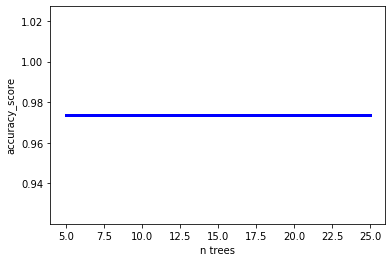

In [2]:
dataset = datasets.load_iris()
Process_RandomForest(dataset,'Classifier',[5,10,15,20,25])

Mean squared error by 5 trees: 23.30
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [0.05696721 0.         0.01138431 0.00168424 0.01182954 0.40272624
 0.00134597 0.05246283 0.00065892 0.00303873 0.00840512 0.00494047
 0.44455641] 

Mean squared error by 10 trees: 16.67
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [0.04820789 0.         0.00079413 0.00284202 0.01502203 0.46589324
 0.00854964 0.05210522 0.00080178 0.00925653 0.0142712  0.01258681
 0.36966951] 

Mean squared error by 15 trees: 19.25
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [3.73062672e-02 2.26869685e-04 1.47943397e-03 0.00000000e+00
 2.58621666e-02 4.75664336e-01 3.99162612e-03 5.60964455e-02
 3.34618244e-03 7.49283905e-03 1.51777263e-02 5.31275795e-03
 3.68043350e-01] 

Mean squared error by 20 trees: 16.34
['CRIM' 'ZN' 'INDUS' 'CHA

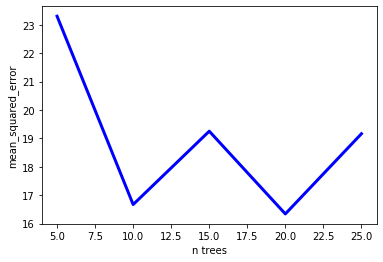

In [3]:
dataset = datasets.load_boston()
Process_RandomForest(dataset,'Regressor',[5,10,15,20,25])